# Importing and Data Preparation

In [143]:
# !pip install h2o 
# #we need to run this at every instance if we are using google colab, 

In [144]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [145]:
# importing relevant libraries

import time

import matplotlib.pyplot as plt # plotting graphs
import seaborn as sns

from pylab import rcParams

import sys
import shap

import numpy as np # linear algebra
np.set_printoptions(threshold=sys.maxsize) # view max elements of numpy array

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# pd.set_option('display.max_columns', None) #pandas shows maximum columns
# pd.set_option('display.max_rows', 146) #pandas shows 146 rows

import os # for file directories

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, make_scorer, mean_squared_error, accuracy_score)
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA

In [146]:
# ls # shows our directory

In [147]:
# os.chdir('/content/drive/MyDrive/Colab Files/MercJbs') # change directory

In [148]:
# ls # show current files/folders in directory

In [149]:
# pwd

In [150]:
# import dataset
df_week = pd.read_csv(r'data/week_approach_maskedID_timeseries_v2.0.csv')

In [151]:
df_week.head(1)

,Unnamed: 0,nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,...,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,athlete_id,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
0,0,5,2,22.2,16.4,11.8,1,2,10.0,10.0,...,0.0,0.18,0.16,0.2,0,0,0.718447,1.378882,1.919255,0


In [152]:
df_week.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_week['date'] = df_week['date'].astype('category')

In [153]:
# df_week['injury'] = df_week['injury'].apply(lambda x: 'yes' if x == 1 else 'no')

In [154]:

df_week[df_week.nunique()[df_week.nunique() < 30].index] = df_week[df_week.nunique()[df_week.nunique() < 30].index].astype('category')
df_week['injury'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [155]:
df_week.head()

,nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,...,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,athlete_id,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
0,5,2,22.2,16.4,11.8,1,2,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5,2,21.6,16.4,11.7,1,2,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5,2,21.6,16.4,11.7,1,2,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5,2,21.6,16.4,11.7,1,2,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6,1,39.2,17.6,18.9,1,3,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [156]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   nr_sessions                                   42798 non-null  category
 1   nr_rest_days                                  42798 non-null  category
 2   total_kms                                     42798 non-null  float64 
 3   max_km_one_day                                42798 non-null  float64 
 4   total_km_z3-z4-z5-t1-t2                       42798 non-null  float64 
 5   nr_tough_sessions_(effort_in_z5,_t1_or_t2)    42798 non-null  category
 6   nr_days_with_interval_session                 42798 non-null  category
 7   total_km_z3-4                                 42798 non-null  float64 
 8   max_km_z3-4_one_day                           42798 non-null  float64 
 9   total_km_z5-t1-t2                             4279

In [157]:
df_week.to_csv('data/week_approach_maskedID_timeseries_v3.0.csv')

# Introduction

In this notebook, we run some advance classification ML algorithms on our datasets. As a result of our dataset having many rows/entries (42766) and columns (73), we use a dimensionality reduction technique (PCA) to see the variability on the data.

<!-- ## PCA -->

<!-- from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA -->

<!-- Xd = df_week.drop(columns = ['injury'])
yd = df_week['injury'] -->

<!-- pca = make_pipeline(StandardScaler(), PCA(.95))
# pca = PCA()
pca.fit_transform(Xd)
pca -->

<!-- **Explained variance** is the amount of variance explained by each of the selected components.  -->

<!-- # pca[1].n_components_ -->

<!-- explained = pca[1].explained_variance_ratio_
explained -->

<!-- cumulative_explained = explained.cumsum()

cumulative_explained -->

<!-- pca[1].components_.shape -->

<!-- plt.figure(figsize=(15,7.5))
plt.plot(range(0, 53), explained, label='Explained Variance')
plt.plot(range(0, 53), cumulative_explained, label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.vlines(x=42, ymin= -0.1, ymax=1.1, colors= 'k', label = "42nd Component")
plt.hlines(y=0.90, xmin=-0.5, xmax=72, colors= 'g', linestyles='--', label = "90% Explained")
plt.title('Explained Variance Ratio')
plt.legend()
plt.show() -->

# Model 1 : Autoencoder
**What is Autoencoder?**

Autoencoder is an unsupervised artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible. Autoencoder, by design, reduces data dimensions by learning how to ignore the noise in the data. 

**Why Autoencoder works for Anomaly Detection?**

Autoencoders are great in learning what is normal. I can identify the normal region ina distribution then anything that is considered an outlier will return a high reconstruction error.

Let's start by installing some pre-requisite libraries, h20. 

**H2O** is an open-source library that can be used to do a number of machine learning tasks. It has a function for the autoencoders. Let's have a look

## Starting and initializing H2O server.

In [158]:
h2o.init() # initializing h2o server
# h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 51 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_USER_61dy3j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.549 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


We now load the dataset into a H2O dataframe and splitting the DS.

In [159]:
hdf_week = h2o.import_file(r"data/week_approach_maskedID_timeseries_v3.0.csv") #import the file as a h2o file
hdf_week["date"] = hdf_week["date"].asfactor() # coonvert date to factor i.e categorical
hdf_week["injury"] = hdf_week["injury"].asfactor()
features_week  = hdf_week.drop(['athlete_id', 'C1'], axis=1) # we do not need the athlete id again alonside the 'C1' column which is an automatic addition by h2o import
train_week , test_week = features_week.split_frame([0.8]) # 80% of data for training and 20% for testing 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


We used a 80-20 split between the training and testing because of the imbalance in the dataset. This spit enables us to get enough of the undersampled class.

In [160]:
features_week.head(3)

nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,max_km_z5-t1-t2_one_day,total_hours_alternative_training,nr_strength_trainings,avg_exertion,min_exertion,max_exertion,avg_training_success,min_training_success,max_training_success,avg_recovery,min_recovery,max_recovery,nr_sessions_1,nr_rest_days_1,total_kms_1,max_km_one_day_1,total_km_z3-z4-z5-t1-t2_1,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1",nr_days_with_interval_session_1,total_km_z3-4_1,max_km_z3-4_one_day_1,total_km_z5-t1-t2_1,max_km_z5-t1-t2_one_day_1,total_hours_alternative_training_1,nr_strength_trainings_1,avg_exertion_1,min_exertion_1,max_exertion_1,avg_training_success_1,min_training_success_1,max_training_success_1,avg_recovery_1,min_recovery_1,max_recovery_1,nr_sessions_2,nr_rest_days_2,total_kms_2,max_km_one_day_2,total_km_z3-z4-z5-t1-t2_2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)_2",nr_days_with_interval_session_2,total_km_z3-4_2,max_km_z3-4_one_day_2,total_km_z5-t1-t2_2,max_km_z5-t1-t2_one_day_2,total_hours_alternative_training_2,nr_strength_trainings_2,avg_exertion_2,min_exertion_2,max_exertion_2,avg_training_success_2,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
5,2,22.2,16.4,11.8,1,2,10,10,0.6,0.6,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,30.9,13.8,13.5,0,2,12.4,6.4,0,0,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,3,4,16.1,9.9,3.9,0,1,3.2,3.2,0,0,0,1,0.09,0.08,0.1,0,0,0,0.18,0.16,0.2,0,0.718447,1.37888,1.91925,0
5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,4,3,21.2,9.9,5,0,1,3.2,3.2,0,0,0,1,0.1,0.08,0.1,0,0,0,0.18,0.16,0.2,0,0.683544,1.01887,1.49057,1
5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,3,4,21.2,9.9,5,0,1,3.2,3.2,0,0,0,0,0.1,0.1,0.1,0,0,0,0.17,0.16,0.18,0,0.683544,1.01887,1.49057,2


In [161]:
features_week.types

{'nr_sessions': 'int',
 'nr_rest_days': 'int',
 'total_kms': 'real',
 'max_km_one_day': 'real',
 'total_km_z3-z4-z5-t1-t2': 'real',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)': 'int',
 'nr_days_with_interval_session': 'int',
 'total_km_z3-4': 'real',
 'max_km_z3-4_one_day': 'real',
 'total_km_z5-t1-t2': 'real',
 'max_km_z5-t1-t2_one_day': 'real',
 'total_hours_alternative_training': 'real',
 'nr_strength_trainings': 'int',
 'avg_exertion': 'real',
 'min_exertion': 'real',
 'max_exertion': 'real',
 'avg_training_success': 'real',
 'min_training_success': 'real',
 'max_training_success': 'real',
 'avg_recovery': 'real',
 'min_recovery': 'real',
 'max_recovery': 'real',
 'nr_sessions_1': 'int',
 'nr_rest_days_1': 'int',
 'total_kms_1': 'real',
 'max_km_one_day_1': 'real',
 'total_km_z3-z4-z5-t1-t2_1': 'real',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1': 'int',
 'nr_days_with_interval_session_1': 'int',
 'total_km_z3-4_1': 'real',
 'max_km_z3-4_one_day_1': 'real',
 'total_km_z5-t1-t2

We now preprocess the dataset by seperating training and test data.

In [162]:
# converting to pandas dataframe
train_week_df = train_week.as_data_frame()
test_week_df = test_week.as_data_frame()

# noinjury_df_tr = train_week_df[train_week_df['injury'] == 0]
# injury_df_tr = train_week_df[train_week_df['injury'] == 1]

In [163]:
# drop the Class variable

Y_test_df = test_week_df['injury'] # true labels of the testing set
Y_test_df_ = pd.DataFrame(Y_test_df) # convert to pandas dataframe from pandas series
test_df = test_week_df.drop(['injury'], axis=1)

In [164]:
# converting to h2o frame
Y_test_h2o = h2o.H2OFrame(Y_test_df_) 
train_h2o = h2o.H2OFrame(train_week_df) 
test_h2o = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [165]:
cols = train_h2o.columns
cols.remove('injury')

In [166]:
cols

['nr_sessions',
 'nr_rest_days',
 'total_kms',
 'max_km_one_day',
 'total_km_z3-z4-z5-t1-t2',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)',
 'nr_days_with_interval_session',
 'total_km_z3-4',
 'max_km_z3-4_one_day',
 'total_km_z5-t1-t2',
 'max_km_z5-t1-t2_one_day',
 'total_hours_alternative_training',
 'nr_strength_trainings',
 'avg_exertion',
 'min_exertion',
 'max_exertion',
 'avg_training_success',
 'min_training_success',
 'max_training_success',
 'avg_recovery',
 'min_recovery',
 'max_recovery',
 'nr_sessions_1',
 'nr_rest_days_1',
 'total_kms_1',
 'max_km_one_day_1',
 'total_km_z3-z4-z5-t1-t2_1',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1',
 'nr_days_with_interval_session_1',
 'total_km_z3-4_1',
 'max_km_z3-4_one_day_1',
 'total_km_z5-t1-t2_1',
 'max_km_z5-t1-t2_one_day_1',
 'total_hours_alternative_training_1',
 'nr_strength_trainings_1',
 'avg_exertion_1',
 'min_exertion_1',
 'max_exertion_1',
 'avg_training_success_1',
 'min_training_success_1',
 'max_training_success_1',

We now create a local estimator and start the training process

In the deep learning model below, we included the h2o library for anomaly detection i.e autoencoder.

In [167]:
# our model with its hyper parameters

deepl_model = H2ODeepLearningEstimator(activation = "Tanh",
                               hidden = [15,7,7,7,15],
                               epochs = 100,
                               standardize = True,
                                stopping_metric = 'MSE',
                                loss = 'automatic',
                                train_samples_per_iteration = 32,
                                shuffle_training_data = True,     
                               autoencoder = True,
                               l1 = 10e-5)

In [168]:
%timeit deepl_model.train(x = cols , y = 'injury', training_frame = train_h2o) # this takes a while at least an hour 

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
2min 31s ± 35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [169]:
# Evaluate performance:

perf = deepl_model.model_performance()
perf


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.005657444115943373
RMSE: 0.0752159831149163


The MSE & RMSE helps us to understand how far off our prediction is on the training data as opposed to the actual results. The small number above which almost equals zero tells us that our model performs well on the training set.

We also note that $RMSE = \sqrt{MSE}$

Show the model feature importance in a dataframe

In [170]:
deepl_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,date,1.000000,1.000000,0.033991
1,nr_rest_days_1,0.796457,0.796457,0.027072
2,nr_rest_days,0.794395,0.794395,0.027002
3,min_training_success_1,0.781789,0.781789,0.026574
4,max_training_success_2,0.774766,0.774766,0.026335
...,...,...,...,...
66,max_km_z5-t1-t2_one_day_1,0.017313,0.017313,0.000588
67,rel_total_kms_week_1_2,0.015652,0.015652,0.000532
68,rel_total_kms_week_0_2,0.014960,0.014960,0.000509
69,injury,0.014096,0.014096,0.000479


Visualization of the feature importance

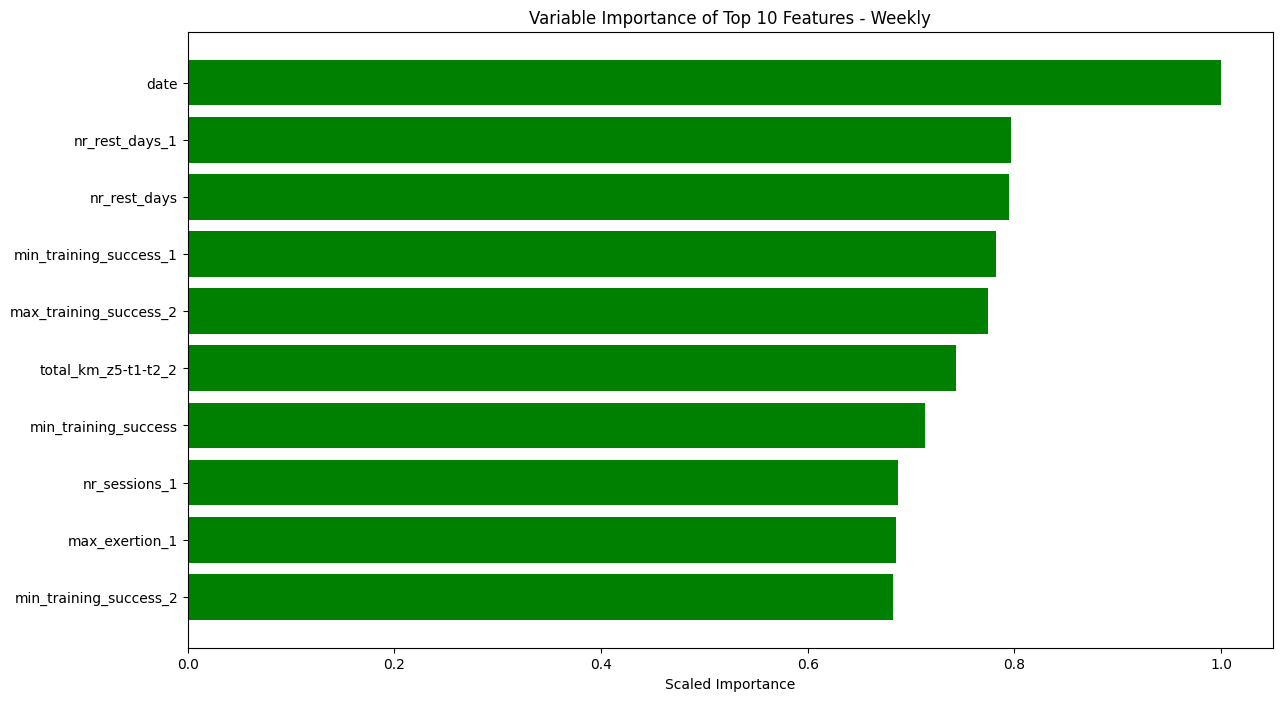

In [171]:
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = deepl_model._model_json['output']['variable_importances']['variable']
var = variables[0:10]
y_pos = np.arange(len(var))

scaled_importance = deepl_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:10]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
# ax.set_yticklabels(variables)
ax.set_yticklabels(var)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance of Top 10 Features - Weekly')
plt.savefig('feat_imp_weeklydata.png' ,bbox_inches='tight')
plt.show()

Visualize the model loss.

Text(0.5, 0, 'epoch')

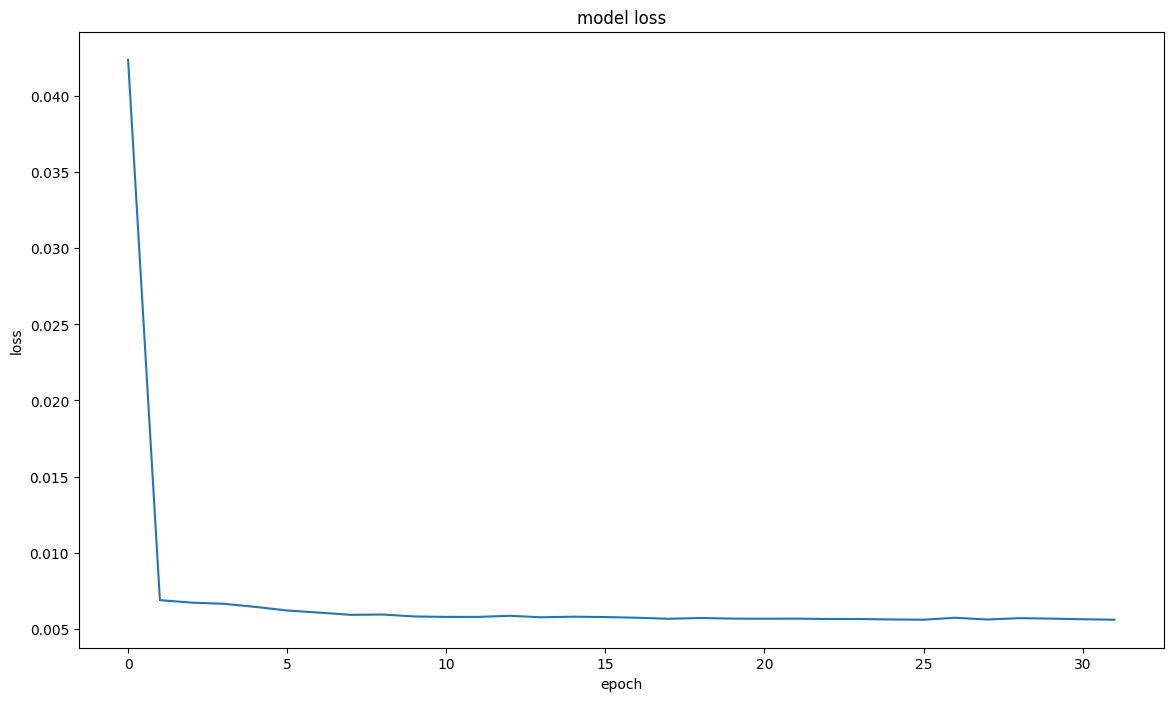

In [42]:
# plotting the loss

scoring_history = deepl_model.score_history()

rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Visualize the scatter plot across the dataset

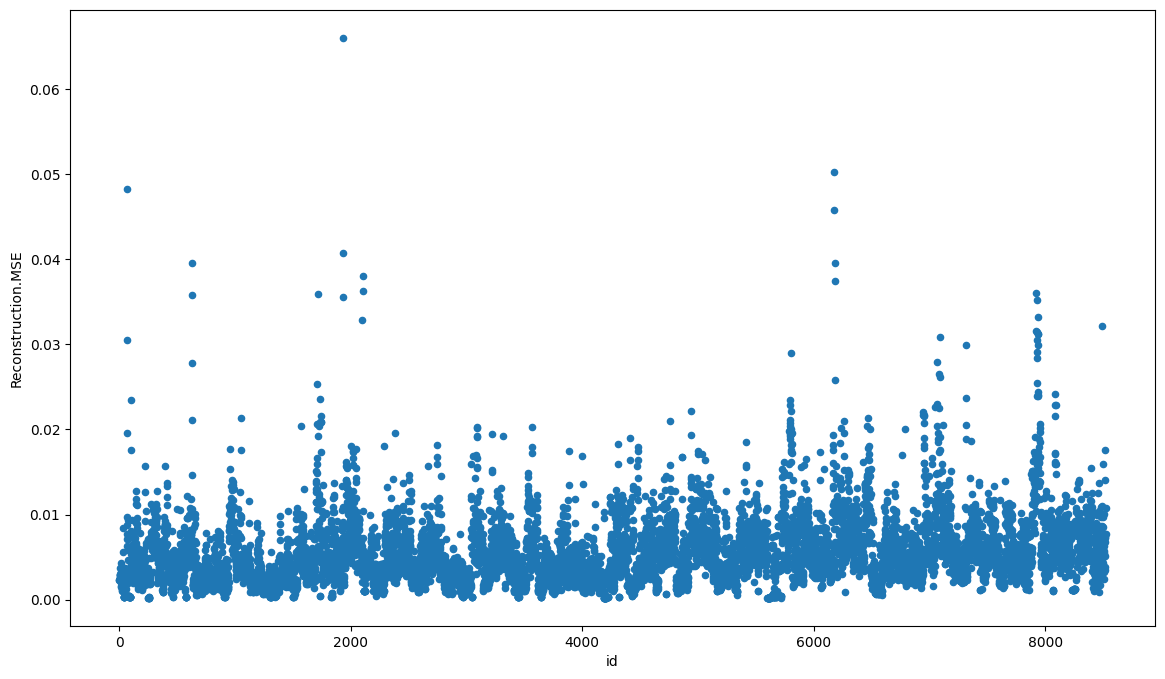

In [43]:
test_rec_error = deepl_model.anomaly(test_h2o) 

# deepl is a H2O function which calculates the error for the dataset

# converting to pandas dataframe
test_rec_error_df = test_rec_error.as_data_frame()

# plotting the testing dataset against the error
test_rec_error_df['id'] = test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [44]:
# predicting the class for the testing dataset
predictions = deepl_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': Y_test_df})
error_df.groupby('true_class').count()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,reconstruction_error
true_class,
0,8405
1,120


Calculate the threshold score/ cutoff score

In [45]:
score_mean = error_df['reconstruction_error'].mean()
score_std = error_df['reconstruction_error'].std()
score_cutoff = score_mean + 4*score_std
score_cutoff

0.022119428856661474

In [46]:
error_df[(error_df['true_class'] == 1) & error_df['reconstruction_error'] > 0.0095].count()

reconstruction_error    120
true_class              120
dtype: int64

Print out the confusion matrix and adjust and tune the confusion matrix from the threshold.

In [47]:
# len(y_pred), len(error_df.true_class)

In [48]:
error_df[error_df['true_class'] == 'NaN' ]

,reconstruction_error,true_class


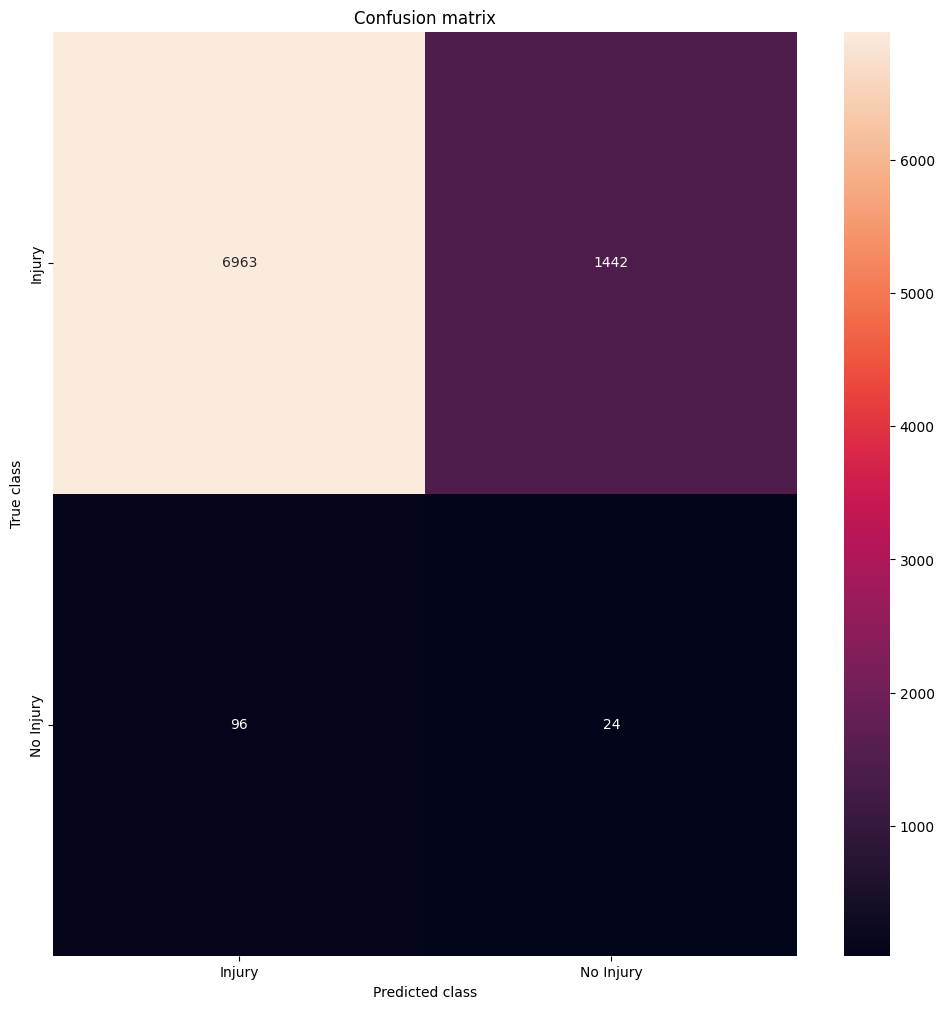

In [268]:
threshold = 0.0085 # we can equally choose to use different values for our threshold [0.009]
LABELS = ['Injury', 'No Injury']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

The confusion matrix above helps us to understand our accuracy on the test data. 

We note that:
- 6963: The model predicts this case to be actually injury where the true case is injury too.
- 24: The model predicts no-injury with the true case being no injury.
- 96: The model predicts injury where the actual class in no-injury
- 1442: The model predicts no-injury where the actual class is injury.

The above explanation is given in the classification report below.

In [269]:
print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8405
           1       0.02      0.20      0.03       120

    accuracy                           0.82      8525
   macro avg       0.50      0.51      0.47      8525
weighted avg       0.97      0.82      0.89      8525



In [270]:
f1_score(error_df.true_class, y_pred)

0.030264817150063048

In [273]:
accuracy_score(error_df.true_class, y_pred)

0.8195894428152493

In [274]:
mean_squared_error(error_df.true_class, y_pred)

0.18041055718475074

# Model 2: Isolation Forest

In [41]:
def drop_a_column(df, cols):
    """
    This functiion drops a column in a dataframe and returns the new df without
    the dropped column.

    cols is a list
    df is a dataframe
    """

    df_dr = df.drop(cols, axis = 1)

    return df_dr

In [42]:
# inliers = df_week[df_week.injury == 'no']
inliers = df_week[df_week.injury == 0]
inliers_y = inliers.injury
inliers = inliers.drop(['injury', 'athlete_id'], axis = 1)

In [43]:
# outliers = df_week[df_week.injury == 'yes']
outliers = df_week[df_week.injury == 1]
outliers_y = outliers.injury
outliers = outliers.drop(['injury', 'athlete_id'], axis = 1)

In [44]:
inliers.head(2)

,nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,...,avg_training_success_2,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
0,5,2,22.2,16.4,11.8,1,2,10.0,10.0,0.6,...,0.0,0.0,0.0,0.18,0.16,0.2,0.718447,1.378882,1.919255,0
1,5,2,21.6,16.4,11.7,1,2,10.0,10.0,0.5,...,0.0,0.0,0.0,0.18,0.16,0.2,0.683544,1.018868,1.490566,1


In [45]:
inliers.shape, outliers.shape # this is the respective dimension of our no-injury and injury data in our dataset respectively.

((42223, 70), (575, 70))

In [46]:
inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state=42)

## Train the isolation Forest Model

In [47]:
rng = np.random.RandomState(42)

In [48]:
# inliers = df_week[df_week.injury == 'no']
# inliers = df_week[df_week.injury == 1]
# inliers_y = inliers.injury
# inliers = inliers.drop(['injury'], axis = 1)

In [49]:
inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state = 42)

In [50]:
# inliers_tr_y = inliers_train.injury
# inliers_train = drop_a_column(inliers_train, ['injury', 'athlete_id'])

In [51]:
# inliers_test = drop_a_column(inliers_test, ['injury', 'athlete_id'])

In [52]:
model_iso = IsolationForest( max_samples=150, random_state=rng, contamination='auto')
# model_iso = IsolationForest( max_samples=150, random_state=rng, contamination=0.01)
model_iso.fit(inliers_train)
inlier_pred_test = model_iso.predict(inliers_test)
outlier_pred = model_iso.predict(outliers)

In [54]:
print("Accuracy in Detecting no-injury Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting injury Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting no-injury Cases: 0.8467732386027235
Accuracy in Detecting injury Cases: 0.17565217391304347


In [33]:
np.unique(outlier_pred)

array([-1,  1])

In [34]:
# calculate score

# mark inliers 1, outliers -1

outliers_y = outliers_y.replace(1, -1)

outliers_y = outliers_y.replace(0, 1)

score = f1_score(outliers_y, outlier_pred, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.299


In [35]:
accuracy_score(outliers_y, outlier_pred)

0.17565217391304347

In [36]:
mean_squared_error(outliers_y, outlier_pred)

3.2973913043478262

We can then compare the predictions from the model to the expected target values and calculate a score. Given that we have crisp class labels, we might use a score like precision, recall, or a combination of both, such as the F-measure (F1-score).

In this case, we will use F-measure score, which is the harmonic mean of precision and recall. We can calculate the F-measure using the f1_score() function and specify the label of the minority class as -1 via the “pos_label” argument.

# Model 3: One Class SVM

One Class Classification (OCC) aims to differentiate samples of one particular class by learning from single class samples during training. It is one of the most commonly used approaches to solve Anamoly Detection (AD), a subfield of machine learning that deals with identifying anomalous cases which the model has never seen before. OCC is also called unary classification, class-modelling.

In [55]:
X = df_week.drop(columns = ['injury', 'athlete_id'])
y = df_week['injury']

In [56]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.80, random_state=2, stratify=y)

<!-- train = trainX.copy()
train['injury'] = trainy
# train -->

<!-- # standardize the dataset
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(trainX)

# Apply transform to both the training set and the test set.
trainX = scaler.transform(trainX)
testX = scaler.transform(testX) -->


In [57]:
model_onec_svm = OneClassSVM() #one class svm model

In [58]:
# kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = np.arange(2,5)
gamma = ['scale', 'auto']
shrinking = [True, False]

tune_parameters = [{"kernel": kernel, 'degree':degree, 'gamma':gamma, 'shrinking':shrinking}]

In [59]:
tune_parameters

[{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'degree': array([2, 3, 4]),
  'gamma': ['scale', 'auto'],
  'shrinking': [True, False]}]

In [60]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_onec_svm,
                           param_grid = tune_parameters,
                           cv = 10,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [61]:
# we fit on majority class
trainX_copy = trainX.copy()
trainX_copy['injury'] = trainy
trainX_copy = trainX_copy[trainX_copy.injury == 0]

trainy_copy = trainy[trainy ==0]
trainX_copy = trainX_copy.drop(columns = 'injury')
# trainy_copy = 

In [62]:
trainy_copy.shape, trainX_copy.shape

((8444,), (8444, 70))

In [63]:
# %%time
# grid_search.fit(trainX_copy, trainy_copy)  # hyper parameter tuning to avoid over fitting
# # grid_search.fit(trainX_copy)

In [64]:
# grid_search.best_score_, grid_search.best_estimator_

In [65]:
# oc_svm_best = grid_search.best_estimator_

In [66]:
# define outlier detection model
model = OneClassSVM(gamma='auto', nu=0.55)

In [67]:
# fit on majority class

model.fit(trainX_copy)

OneClassSVM(gamma='auto', nu=0.55)

In [68]:
# detect outliers in the test set
yhat = model.predict(testX)

In [69]:
# mark inliers 1, outliers -1

testy = testy.replace(1, -1)

testy = testy.replace(0, 1)

In [70]:
print(classification_report( testy, yhat ))

              precision    recall  f1-score   support

          -1       0.01      1.00      0.03       460
           1       1.00      0.03      0.06     33779

    accuracy                           0.04     34239
   macro avg       0.51      0.51      0.04     34239
weighted avg       0.98      0.04      0.06     34239



In [71]:
# calculate score
score = f1_score(testy, yhat, pos_label= -1)
print('F1 Score: %.3f' % score)

F1 Score: 0.027


In [72]:
accuracy_score(testy, yhat)

0.0436344519407693

In [73]:
mean_squared_error(testy, yhat)

3.8254621922369227

# A -  Repeating Models with Standardized data

In [74]:
df_week2 = df_week.drop(columns = 'athlete_id')

std_scaler = StandardScaler()

df_week_scaled = std_scaler.fit_transform(df_week2.drop(columns = 'injury').to_numpy())
df_week_scaled = pd.DataFrame(df_week_scaled, columns=list(df_week2.drop(columns = 'injury')))
df_week_scaled['injury'] = df_week.injury

## Model 2: Isolation Forest II

In [75]:
def drop_a_column(df, cols):
    """
    This functiion drops a column in a dataframe and returns the new df without
    the dropped column.

    cols is a list
    df is a dataframe
    """

    df_dr = df.drop(cols, axis = 1)

    return df_dr

In [76]:
# inliers = df_week_scaled[df_week_scaled.injury == 'no']
inliers = df_week_scaled[df_week_scaled.injury == 0] #  no injury data
inliers_y = inliers.injury #  no injury reponse data
inliers = inliers.drop(['injury'], axis = 1)

In [77]:
# outliers = df_week_scaled[df_week_scaled.injury == 'yes']
outliers = df_week_scaled[df_week_scaled.injury == 1] #  injury data
outliers_y = outliers.injury #  injury reponse data
outliers = outliers.drop(['injury'], axis = 1)

In [78]:
inliers.head(2)

,nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,...,avg_training_success_2,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
0,-0.325793,0.067628,-0.744770,0.263543,0.266274,0.067091,0.259173,0.735992,1.429448,-0.613609,...,-1.316877,-1.138703,-1.345902,-0.490097,-0.194751,-0.653759,-0.101858,-0.129793,-0.103154,-1.522325
1,-0.325793,0.067628,-0.761112,0.263543,0.255021,0.067091,0.259173,0.735992,1.429448,-0.631323,...,-1.316877,-1.138703,-1.345902,-0.490097,-0.194751,-0.653759,-0.101858,-0.129793,-0.103154,-1.521085


In [79]:
inliers.shape, outliers.shape # this is the respective dimension of our no-injury and injury data in our dataset respectively.

((42223, 70), (575, 70))

In [80]:
inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state=42)

### Train the isolation Forest Model

In [81]:
rng = np.random.RandomState(42)

In [82]:
inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state = 42)

In [83]:
model_iso = IsolationForest( max_samples=150, random_state=rng, contamination='auto')
# model_iso = IsolationForest( max_samples=150, random_state=rng, contamination=0.01)
model_iso.fit(inliers_train)
inlier_pred_test = model_iso.predict(inliers_test)
outlier_pred = model_iso.predict(outliers)

In [84]:
print("Accuracy in Detecting injury Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting no-injury Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting injury Cases: 0.846299585553582
Accuracy in Detecting no-injury Cases: 0.16521739130434782


In [63]:
np.unique(outlier_pred)

array([-1,  1])

In [64]:
# calculate score

# mark inliers 1, outliers -1

outliers_y = outliers_y.replace(1, -1)

outliers_y = outliers_y.replace(0, 1)

score = f1_score(outliers_y, outlier_pred, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.284


In [66]:
accuracy_score(outliers_y, outlier_pred)

0.16521739130434782

In [65]:
mean_squared_error(outliers_y, outlier_pred)

3.3391304347826085

## Model 3: One Class SVM II

In [85]:
X = df_week_scaled.drop(columns = ['injury'])
y = df_week_scaled['injury']

In [86]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.80, random_state=2, stratify=y)

In [87]:
# we fit on majority class
trainX_copy = trainX.copy()
trainX_copy['injury'] = trainy
trainX_copy = trainX_copy[trainX_copy.injury == 0]

trainy_copy = trainy[trainy ==0]

trainX_copy = trainX_copy.drop(columns = 'injury')

In [88]:
trainy_copy.shape, trainX_copy.shape

((8444,), (8444, 70))

In [89]:
# define outlier detection model
model = OneClassSVM(gamma='auto', nu=.55)

In [90]:
# fit on majority class

model.fit(trainX_copy)

OneClassSVM(gamma='auto', nu=0.55)

In [91]:
# detect outliers in the test set
yhat = model.predict(testX)

In [92]:
# mark inliers 1, outliers -1

testy = testy.replace(1, -1)

testy = testy.replace(0, 1)

In [93]:
print(classification_report( testy, yhat ))

              precision    recall  f1-score   support

          -1       0.01      0.52      0.02       460
           1       0.99      0.45      0.62     33779

    accuracy                           0.45     34239
   macro avg       0.50      0.48      0.32     34239
weighted avg       0.97      0.45      0.61     34239



In [94]:
accuracy_score(testy, yhat)

0.4509769561026899

In [95]:
accuracy_score(testy, yhat)

0.4509769561026899

In [96]:
mean_squared_error(testy, yhat)

2.19609217558924

In [97]:
# calculate score
score = f1_score(testy, yhat, pos_label= -1)
print('F1 Score: %.3f' % score)

F1 Score: 0.025


The outcome for both scaled and unscaled data, the results are the same in terms of f1 score for IF, but for the SVM, there is an improvement with scaling.

# B - Repeating Models with PCA

## Model 2: Isolation Forest III

In [80]:
# Make an instance of the Model
pca_if = PCA(.95) # retain 95% variance in the data

In [81]:
# inliers = df_week_scaled[df_week_scaled.injury == 'no']
inliers = df_week_scaled[df_week_scaled.injury == 0] #  no injury data


####---------may comment-------------###
# inliers_y = inliers.injury #  no injury reponse data 
# inliers = inliers.drop(['injury'], axis = 1)

In [82]:
# outliers = df_week_scaled[df_week_scaled.injury == 'yes']
outliers = df_week_scaled[df_week_scaled.injury == 1] #  injury data
outliers_y = outliers.injury #  injury reponse data
outliers = outliers.drop(['injury'], axis = 1)

In [83]:
inliers.head(2)

,nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,...,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date,injury
0,-0.325793,0.067628,-0.744770,0.263543,0.266274,0.067091,0.259173,0.735992,1.429448,-0.613609,...,-1.138703,-1.345902,-0.490097,-0.194751,-0.653759,-0.101858,-0.129793,-0.103154,-1.522325,0
1,-0.325793,0.067628,-0.761112,0.263543,0.255021,0.067091,0.259173,0.735992,1.429448,-0.631323,...,-1.138703,-1.345902,-0.490097,-0.194751,-0.653759,-0.101858,-0.129793,-0.103154,-1.521085,0


In [84]:
inliers.shape, outliers.shape # this is the respective dimension of our no-injury and injury data in our dataset respectively.

((42223, 71), (575, 70))

In [85]:
inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state=42)

In [86]:
inliers_train_y = inliers_train.injury #  no injury reponse data
inliers_train = inliers_train.drop(['injury'], axis = 1)

inliers_test_y = inliers_test.injury
inliers_test = inliers_test.drop(['injury'], axis = 1)

In [87]:
# inliers_train

### Apply PCA on data splits

Fit PCA on training set on training set alone.

In [88]:
pca_if.fit(inliers_train)

PCA(n_components=0.95)

Apply the mapping (transform) to both the training set and the test set.

In [89]:
inliers_train.shape

(33778, 70)

In [90]:
inliers_train = pca_if.transform(inliers_train)
inliers_test = pca_if.transform(inliers_test)
outliers = pca_if.transform(outliers)

### Train the isolation Forest Model

In [91]:
rng = np.random.RandomState(42)

In [92]:
# inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state = 42)

In [93]:
model_iso = IsolationForest( max_samples=150, random_state=rng, contamination='auto')
# model_iso = IsolationForest( max_samples=150, random_state=rng, contamination=0.01)
model_iso.fit(inliers_train)
inlier_pred_test = model_iso.predict(inliers_test)
outlier_pred = model_iso.predict(outliers)

In [94]:
print("Accuracy in Detecting injury Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting no-injury Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting injury Cases: 0.959976317347543
Accuracy in Detecting no-injury Cases: 0.03130434782608696


In [95]:
np.unique(outlier_pred)

array([-1,  1])

In [96]:
# calculate score

# mark inliers 1, outliers -1

outliers_y = outliers_y.replace(1, -1)

outliers_y = outliers_y.replace(0, 1)

score = f1_score(outliers_y, outlier_pred, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.061


In [97]:
accuracy_score(outliers_y, outlier_pred)

0.03130434782608696

In [98]:
mean_squared_error(outliers_y, outlier_pred)

3.8747826086956523

The use of PCA reduced our prediction accuracy

## Model 3: One Class SVM III

In [98]:
X = df_week_scaled.drop(columns = ['injury'])
y = df_week_scaled['injury']

In [99]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.80, random_state=2, stratify=y)

In [100]:
# we fit on majority class
trainX_copy = trainX.copy()
trainX_copy['injury'] = trainy
trainX_copy = trainX_copy[trainX_copy.injury == 0]

trainy_copy = trainy[trainy ==0]
trainX_copy = trainX_copy.drop(columns = 'injury')
# trainy_copy = 

### Apply PCA on data splits

In [101]:
# Make an instance of the Model
pca_oc_svm = PCA(.95) # retain 95% variance in the data

Fit PCA on training set on training set alone.

In [102]:
pca_oc_svm.fit(trainX_copy)

PCA(n_components=0.95)

Apply the mapping (transform) to both the training set and the test set.

In [103]:
trainX_copy = pca_oc_svm.transform(trainX_copy)
testX = pca_oc_svm.transform(testX)
# outliers = pca_oc_svm.transform(outliers)

In [104]:
# trainy_copy.shape, trainX_copy.shape

In [105]:
# define outlier detection model
model_one_class_svm_pca = OneClassSVM(gamma='auto', nu=0.55)

In [106]:
# fit on majority class

model_one_class_svm_pca.fit(trainX_copy)

OneClassSVM(gamma='auto', nu=0.55)

In [107]:
# detect outliers in the test set
yhat = model_one_class_svm_pca.predict(testX)

In [108]:
# mark inliers 1, outliers -1

testy = testy.replace(1, -1)

testy = testy.replace(0, 1)

In [109]:
print(classification_report( testy, yhat ))

              precision    recall  f1-score   support

          -1       0.01      0.53      0.03       460
           1       0.99      0.45      0.61     33779

    accuracy                           0.45     34239
   macro avg       0.50      0.49      0.32     34239
weighted avg       0.97      0.45      0.61     34239



In [110]:
# calculate score
score = f1_score(testy, yhat, pos_label= -1)
print('F1 Score: %.3f' % score)

F1 Score: 0.025


In [111]:
accuracy_score(testy, yhat)

0.44744297438593417

In [112]:
mean_squared_error(testy, yhat)

2.2102281024562633

The accuracy further decreased  by 0.002 when we use PCA in One Class SVM.

# C - Dim Red + Unscaled Data

## Model 3: Isolation Forest IV

In [123]:
# Make an instance of the Model
pca_if = PCA(.95) # retain 95% variance in the data

In [124]:
# inliers = df_week_scaled[df_week_scaled.injury == 'no']
inliers = df_week[df_week.injury == 0] #  no injury data


####---------may comment-------------###
# inliers_y = inliers.injury #  no injury reponse data 
# inliers = inliers.drop(['injury'], axis = 1)

In [125]:
# outliers = df_week_scaled[df_week_scaled.injury == 'yes']
outliers = df_week[df_week.injury == 1] #  injury data
outliers_y = outliers.injury #  injury reponse data
outliers = outliers.drop(['injury'], axis = 1)

In [126]:
inliers.head(2)

,nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,...,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,athlete_id,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
0,5,2,22.2,16.4,11.8,1,2,10.0,10.0,0.6,...,0.0,0.18,0.16,0.2,0,0,0.718447,1.378882,1.919255,0
1,5,2,21.6,16.4,11.7,1,2,10.0,10.0,0.5,...,0.0,0.18,0.16,0.2,0,0,0.683544,1.018868,1.490566,1


In [127]:
inliers.shape, outliers.shape # this is the respective dimension of our no-injury and injury data in our dataset respectively.

((42223, 72), (575, 71))

In [128]:
inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state=42)

In [129]:
inliers_train_y = inliers_train.injury #  no injury reponse data
inliers_train = inliers_train.drop(['injury'], axis = 1)

inliers_test_y = inliers_test.injury
inliers_test = inliers_test.drop(['injury'], axis = 1)

In [87]:
# inliers_train

### Apply PCA on data splits

Fit PCA on training set on training set alone.

In [130]:
pca_if.fit(inliers_train)

PCA(n_components=0.95)

Apply the mapping (transform) to both the training set and the test set.

In [131]:
inliers_train = pca_if.transform(inliers_train)
inliers_test = pca_if.transform(inliers_test)
outliers = pca_if.transform(outliers)

### Train the isolation Forest Model

In [132]:
rng = np.random.RandomState(42)

In [133]:
# inliers_train, inliers_test = train_test_split(inliers, test_size=0.20, random_state = 42)

In [134]:
model_iso = IsolationForest( max_samples=150, random_state=rng, contamination='auto')
# model_iso = IsolationForest( max_samples=150, random_state=rng, contamination=0.01)
model_iso.fit(inliers_train)
inlier_pred_test = model_iso.predict(inliers_test)
outlier_pred = model_iso.predict(outliers)

In [135]:
print("Accuracy in Detecting injury Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting no-injury Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting injury Cases: 0.9416222616933096
Accuracy in Detecting no-injury Cases: 0.05217391304347826


In [136]:
np.unique(outlier_pred)

array([-1,  1])

In [137]:
# calculate score

# mark inliers 1, outliers -1

outliers_y = outliers_y.replace(1, -1)

outliers_y = outliers_y.replace(0, 1)

score = f1_score(outliers_y, outlier_pred, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.099


In [138]:
accuracy_score(outliers_y, outlier_pred)

0.05217391304347826

In [139]:
mean_squared_error(outliers_y, outlier_pred)

3.791304347826087

The use of PCA reduced our prediction accuracy

## Model 3: One Class SVM IV

In [113]:
X = df_week.drop(columns = ['injury'])
y = df_week['injury']

In [114]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.80, random_state=2, stratify=y)

In [115]:
# we fit on majority class
trainX_copy = trainX.copy()
trainX_copy['injury'] = trainy
trainX_copy = trainX_copy[trainX_copy.injury == 0]

trainy_copy = trainy[trainy ==0]
trainX_copy = trainX_copy.drop(columns = 'injury')
# trainy_copy = 

### Apply PCA on data splits

In [116]:
# Make an instance of the Model
pca_oc_svm = PCA(.95) # retain 95% variance in the data

Fit PCA on training set on training set alone.

In [117]:
pca_oc_svm.fit(trainX_copy)

PCA(n_components=0.95)

Apply the mapping (transform) to both the training set and the test set.

In [118]:
trainX_copy = pca_oc_svm.transform(trainX_copy)
testX = pca_oc_svm.transform(testX)
# outliers = pca_oc_svm.transform(outliers)

In [119]:
# trainy_copy.shape, trainX_copy.shape

In [120]:
# define outlier detection model
model_one_class_svm_pca = OneClassSVM(gamma='auto', nu=0.55)

In [121]:
# fit on majority class

model_one_class_svm_pca.fit(trainX_copy)

OneClassSVM(gamma='auto', nu=0.55)

In [122]:
# detect outliers in the test set
yhat = model_one_class_svm_pca.predict(testX)

In [123]:
# mark inliers 1, outliers -1

testy = testy.replace(1, -1)

testy = testy.replace(0, 1)

In [124]:
print(classification_report( testy, yhat ))

              precision    recall  f1-score   support

          -1       0.01      0.53      0.03       460
           1       0.99      0.45      0.62     33779

    accuracy                           0.45     34239
   macro avg       0.50      0.49      0.32     34239
weighted avg       0.97      0.45      0.61     34239



In [125]:
# calculate score
score = f1_score(testy, yhat, pos_label= -1)
print('F1 Score: %.3f' % score)

F1 Score: 0.025


In [126]:
accuracy_score(testy, yhat)

0.44869885218610356

In [127]:
mean_squared_error(testy, yhat)

2.2052045912555855

The accuracy further decreased  by 0.002 when we use PCA in One Class SVM.

## Auto Encoder II

## Starting and initializing H2O server.

In [11]:
h2o.init() # initializing h2o server
# h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,49 mins 47 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_USER_61dy3j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.567 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [12]:
hdf_week = h2o.import_file(r"data/week_approach_maskedID_timeseries_v3.0.csv") #import the file as a h2o file
hdf_week["date"] = hdf_week["date"].asfactor() # coonvert date to factor i.e categorical
hdf_week["injury"] = hdf_week["injury"].asfactor()
features_week  = hdf_week.drop(['athlete_id', 'C1'], axis=1) # we do not need the athlete id again alonside the 'C1' column which is an automatic addition by h2o import
train_week , test_week = features_week.split_frame([0.8]) # 80% of data for training and 20% for testing 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


We used a 80-20 split between the training and testing because of the imbalance in the dataset. This spit enables us to get enough of the undersampled class.

In [13]:
features_week.head(3)

nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,max_km_z5-t1-t2_one_day,total_hours_alternative_training,nr_strength_trainings,avg_exertion,min_exertion,max_exertion,avg_training_success,min_training_success,max_training_success,avg_recovery,min_recovery,max_recovery,nr_sessions_1,nr_rest_days_1,total_kms_1,max_km_one_day_1,total_km_z3-z4-z5-t1-t2_1,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1",nr_days_with_interval_session_1,total_km_z3-4_1,max_km_z3-4_one_day_1,total_km_z5-t1-t2_1,max_km_z5-t1-t2_one_day_1,total_hours_alternative_training_1,nr_strength_trainings_1,avg_exertion_1,min_exertion_1,max_exertion_1,avg_training_success_1,min_training_success_1,max_training_success_1,avg_recovery_1,min_recovery_1,max_recovery_1,nr_sessions_2,nr_rest_days_2,total_kms_2,max_km_one_day_2,total_km_z3-z4-z5-t1-t2_2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)_2",nr_days_with_interval_session_2,total_km_z3-4_2,max_km_z3-4_one_day_2,total_km_z5-t1-t2_2,max_km_z5-t1-t2_one_day_2,total_hours_alternative_training_2,nr_strength_trainings_2,avg_exertion_2,min_exertion_2,max_exertion_2,avg_training_success_2,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
5,2,22.2,16.4,11.8,1,2,10,10,0.6,0.6,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,30.9,13.8,13.5,0,2,12.4,6.4,0,0,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,3,4,16.1,9.9,3.9,0,1,3.2,3.2,0,0,0,1,0.09,0.08,0.1,0,0,0,0.18,0.16,0.2,0,0.718447,1.37888,1.91925,0
5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,4,3,21.2,9.9,5,0,1,3.2,3.2,0,0,0,1,0.1,0.08,0.1,0,0,0,0.18,0.16,0.2,0,0.683544,1.01887,1.49057,1
5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,3,4,21.2,9.9,5,0,1,3.2,3.2,0,0,0,0,0.1,0.1,0.1,0,0,0,0.17,0.16,0.18,0,0.683544,1.01887,1.49057,2


In [14]:
features_week.types

{'nr_sessions': 'int',
 'nr_rest_days': 'int',
 'total_kms': 'real',
 'max_km_one_day': 'real',
 'total_km_z3-z4-z5-t1-t2': 'real',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)': 'int',
 'nr_days_with_interval_session': 'int',
 'total_km_z3-4': 'real',
 'max_km_z3-4_one_day': 'real',
 'total_km_z5-t1-t2': 'real',
 'max_km_z5-t1-t2_one_day': 'real',
 'total_hours_alternative_training': 'real',
 'nr_strength_trainings': 'int',
 'avg_exertion': 'real',
 'min_exertion': 'real',
 'max_exertion': 'real',
 'avg_training_success': 'real',
 'min_training_success': 'real',
 'max_training_success': 'real',
 'avg_recovery': 'real',
 'min_recovery': 'real',
 'max_recovery': 'real',
 'nr_sessions_1': 'int',
 'nr_rest_days_1': 'int',
 'total_kms_1': 'real',
 'max_km_one_day_1': 'real',
 'total_km_z3-z4-z5-t1-t2_1': 'real',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1': 'int',
 'nr_days_with_interval_session_1': 'int',
 'total_km_z3-4_1': 'real',
 'max_km_z3-4_one_day_1': 'real',
 'total_km_z5-t1-t2

We now preprocess the dataset by seperating training and test data.

In [15]:
# converting to pandas dataframe
train_week_df = train_week.as_data_frame()
test_week_df = test_week.as_data_frame()

# noinjury_df_tr = train_week_df[train_week_df['injury'] == 0]
# injury_df_tr = train_week_df[train_week_df['injury'] == 1]

In [16]:
# drop the Class variable

Y_test_df = test_week_df['injury'] # true labels of the testing set
Y_test_df_ = pd.DataFrame(Y_test_df) # convert to pandas dataframe from pandas series
test_df = test_week_df.drop(['injury'], axis=1)

In [17]:
# converting to h2o frame
Y_test_h2o = h2o.H2OFrame(Y_test_df_) 
train_h2o = h2o.H2OFrame(train_week_df) 
test_h2o = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
cols = train_h2o.columns
cols.remove('injury')

In [19]:
cols

['nr_sessions',
 'nr_rest_days',
 'total_kms',
 'max_km_one_day',
 'total_km_z3-z4-z5-t1-t2',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)',
 'nr_days_with_interval_session',
 'total_km_z3-4',
 'max_km_z3-4_one_day',
 'total_km_z5-t1-t2',
 'max_km_z5-t1-t2_one_day',
 'total_hours_alternative_training',
 'nr_strength_trainings',
 'avg_exertion',
 'min_exertion',
 'max_exertion',
 'avg_training_success',
 'min_training_success',
 'max_training_success',
 'avg_recovery',
 'min_recovery',
 'max_recovery',
 'nr_sessions_1',
 'nr_rest_days_1',
 'total_kms_1',
 'max_km_one_day_1',
 'total_km_z3-z4-z5-t1-t2_1',
 'nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1',
 'nr_days_with_interval_session_1',
 'total_km_z3-4_1',
 'max_km_z3-4_one_day_1',
 'total_km_z5-t1-t2_1',
 'max_km_z5-t1-t2_one_day_1',
 'total_hours_alternative_training_1',
 'nr_strength_trainings_1',
 'avg_exertion_1',
 'min_exertion_1',
 'max_exertion_1',
 'avg_training_success_1',
 'min_training_success_1',
 'max_training_success_1',

We now create a local estimator and start the training process

In the deep learning model below, we included the h2o library for anomaly detection i.e autoencoder.

In [40]:
train_h2o

nr_sessions,nr_rest_days,total_kms,max_km_one_day,total_km_z3-z4-z5-t1-t2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)",nr_days_with_interval_session,total_km_z3-4,max_km_z3-4_one_day,total_km_z5-t1-t2,max_km_z5-t1-t2_one_day,total_hours_alternative_training,nr_strength_trainings,avg_exertion,min_exertion,max_exertion,avg_training_success,min_training_success,max_training_success,avg_recovery,min_recovery,max_recovery,nr_sessions_1,nr_rest_days_1,total_kms_1,max_km_one_day_1,total_km_z3-z4-z5-t1-t2_1,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1",nr_days_with_interval_session_1,total_km_z3-4_1,max_km_z3-4_one_day_1,total_km_z5-t1-t2_1,max_km_z5-t1-t2_one_day_1,total_hours_alternative_training_1,nr_strength_trainings_1,avg_exertion_1,min_exertion_1,max_exertion_1,avg_training_success_1,min_training_success_1,max_training_success_1,avg_recovery_1,min_recovery_1,max_recovery_1,nr_sessions_2,nr_rest_days_2,total_kms_2,max_km_one_day_2,total_km_z3-z4-z5-t1-t2_2,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)_2",nr_days_with_interval_session_2,total_km_z3-4_2,max_km_z3-4_one_day_2,total_km_z5-t1-t2_2,max_km_z5-t1-t2_one_day_2,total_hours_alternative_training_2,nr_strength_trainings_2,avg_exertion_2,min_exertion_2,max_exertion_2,avg_training_success_2,min_training_success_2,max_training_success_2,avg_recovery_2,min_recovery_2,max_recovery_2,injury,rel_total_kms_week_0_1,rel_total_kms_week_0_2,rel_total_kms_week_1_2,date
5,2,22.2,16.4,11.8,1,2,10,10,0.6,0.6,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,30.9,13.8,13.5,0,2,12.4,6.4,0,0,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,3,4,16.1,9.9,3.9,0,1,3.2,3.2,0,0,0,1,0.09,0.08,0.1,0,0,0,0.18,0.16,0.2,0,0.718447,1.37888,1.91925,0
5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,4,3,21.2,9.9,5,0,1,3.2,3.2,0,0,0,1,0.1,0.08,0.1,0,0,0,0.18,0.16,0.2,0,0.683544,1.01887,1.49057,1
5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,3,4,21.2,9.9,5,0,1,3.2,3.2,0,0,0,0,0.1,0.1,0.1,0,0,0,0.17,0.16,0.18,0,0.683544,1.01887,1.49057,2
5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.11,0,0,0,0.17,0.16,0.18,4,3,21.2,9.9,5,0,1,3.2,3.2,0,0,0,1,0.11,0.1,0.12,0,0,0,0.18,0.16,0.18,0,0.683544,1.01887,1.49057,3
6,1,39.2,17.6,18.9,1,3,17.2,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,5,2,17.8,12,7.8,1,2,6,6,0.6,0.6,2.08,2,0.1,0.09,0.11,0,0,0,0.17,0.16,0.18,4,3,28.8,13.8,10.7,0,2,9.6,6.4,0,0,0,1,0.11,0.1,0.12,0,0,0,0.17,0.16,0.18,0,2.20225,1.36111,0.618056,4
6,1,39.2,17.6,18.9,1,3,17.2,10,0.5,0.5,2,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.17,5,2,17.8,12,7.8,1,2,6,6,0.6,0.6,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.16,0.18,5,2,28.8,13.8,10.7,0,2,9.6,6.4,0,0,1.08,1,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,0,2.20225,1.36111,0.618056,5
5,2,33.3,17.6,15.4,1,3,13.7,7.2,0.5,0.5,1,1,0.1,0.08,0.11,0,0,0,0.17,0.17,0.18,5,2,22.2,16.4,11.8,1,2,10,10,0.6,0.6,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,30.9,13.8,13.5,0,2,12.4,6.4,0,0,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,0,1.5,1.07767,0.718447,7
5,2,32.9,17.6,15.5,0,3,14.3,7.2,0,0,1,1,0.1,0.08,0.11,0,0,0,0.17,0.17,0.18,5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,0,1.52315,1.04114,0.683544,8
5,2,32.9,17.6,15.5,0,3,14.3,7.2,0,0,1,1,0.1,0.08,0.11,0,0,0,0.17,0.17,0.18,5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.12,0,0,0,0.17,0.16,0.18,0,1.52315,1.04114,0.683544,9
5,2,32.9,17.6,15.5,0,3,14.3,7.2,0,0,1,1,0.1,0.08,0.11,0,0,0,0.17,0.17,0.18,5,2,21.6,16.4,11.7,1,2,10,10,0.5,0.5,2.08,2,0.1,0.08,0.11,0,0,0,0.17,0.15,0.18,6,1,31.6,13.8,14.2,1,3,12.4,6.4,0.6,0.6,2.08,2,0.1,0.09,0.11,0,0,0,0.17,0.

In [20]:
# our model with its hyper parameters

deepl_model = H2ODeepLearningEstimator(activation = "Tanh",
                               hidden = [15,7,7,7,15],
                               epochs = 100,
                               standardize = False,
                                stopping_metric = 'MSE',
                                loss = 'automatic',
                                train_samples_per_iteration = 32,
                                shuffle_training_data = True,     
                               autoencoder = True,
                               l1 = 10e-5)

In [21]:
%timeit deepl_model.train(x = cols , y = 'injury', training_frame = train_h2o) # this takes a while at least an hour 

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
1min 1s ± 8.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
# Evaluate performance:

perf = deepl_model.model_performance()
perf


ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 1232303716189.851
RMSE: 1110091.7602567147


The MSE & RMSE helps us to understand how far off our prediction is on the training data as opposed to the actual results. The small number above which almost equals zero tells us that our model performs well on the training set.

We also note that $RMSE = \sqrt{MSE}$

Show the model feature importance in a dataframe

In [38]:
deepl_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,injury,1.000000,1.000000,0.089409
1,"nr_tough_sessions_(effort_in_z5,_t1_or_t2)_1",0.191991,0.191991,0.017166
2,min_training_success_2,0.188565,0.188565,0.016859
3,nr_rest_days_2,0.186311,0.186311,0.016658
4,total_hours_alternative_training,0.181459,0.181459,0.016224
...,...,...,...,...
66,min_training_success_1,0.103075,0.103075,0.009216
67,date,0.102763,0.102763,0.009188
68,total_km_z5-t1-t2,0.101149,0.101149,0.009044
69,total_hours_alternative_training_1,0.097870,0.097870,0.008750


Visualization of the feature importance

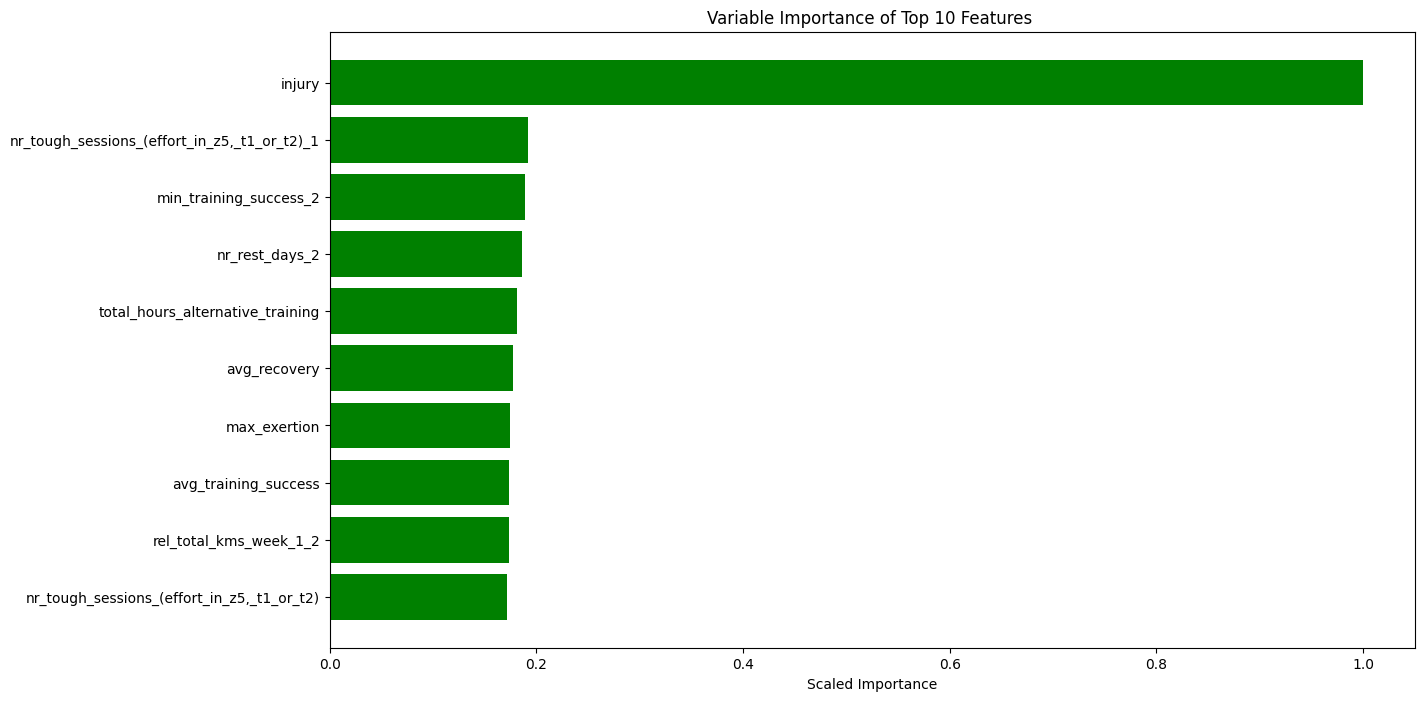

In [39]:
# plotting the variable importance
rcParams['figure.figsize'] = 14, 8
#plt.rcdefaults()
fig, ax = plt.subplots()

variables = deepl_model._model_json['output']['variable_importances']['variable']
var = variables[0:10]
y_pos = np.arange(len(var))

scaled_importance = deepl_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:10]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
# ax.set_yticklabels(variables)
ax.set_yticklabels(var)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance of Top 10 Features ')
plt.show()

Visualize the model loss.

Text(0.5, 0, 'epoch')

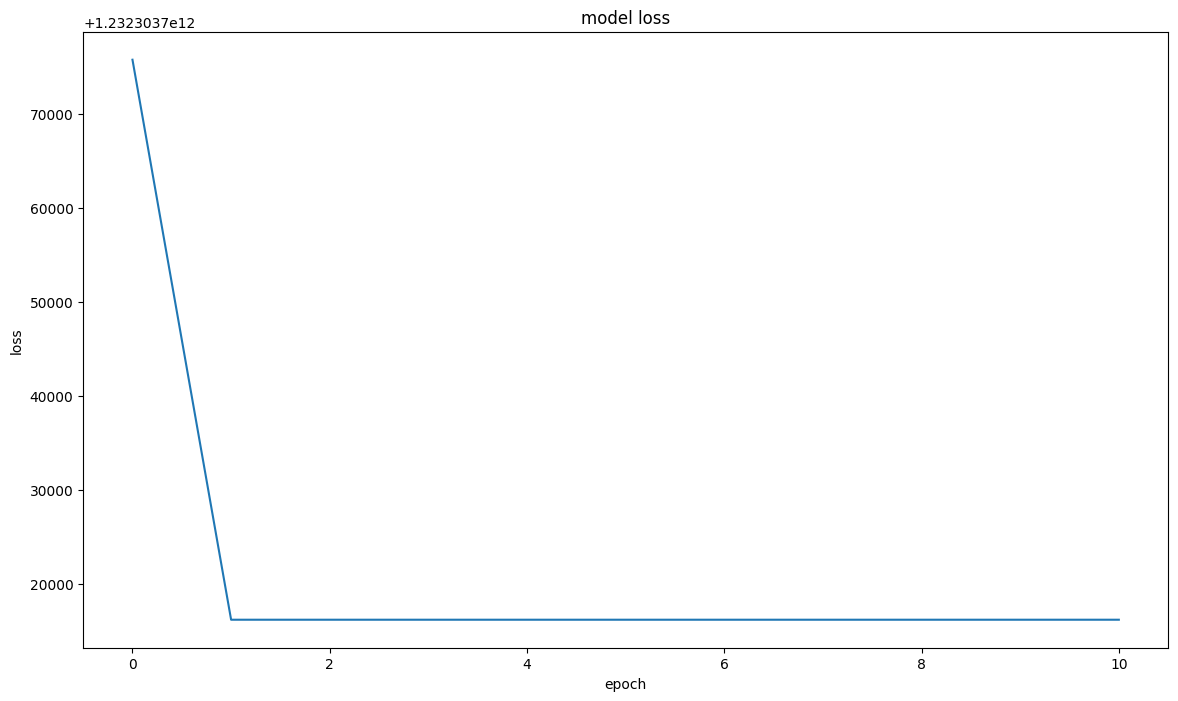

In [25]:
# plotting the loss

scoring_history = deepl_model.score_history()

rcParams['figure.figsize'] = 14, 8
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Visualize the scatter plot across the dataset

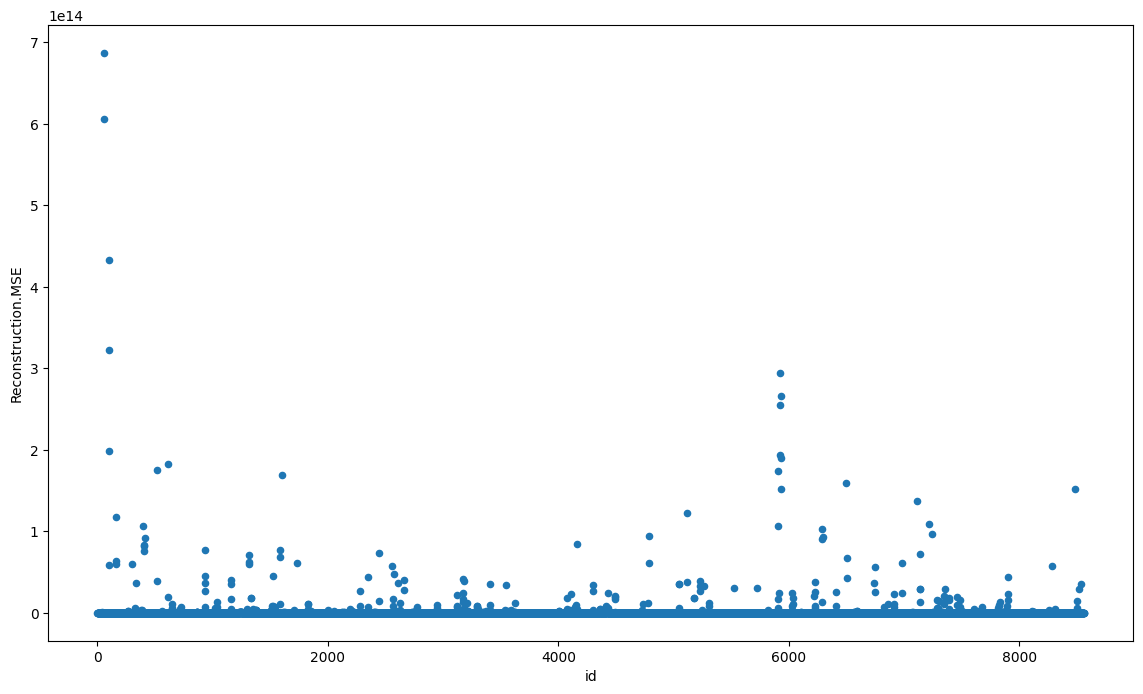

In [26]:
test_rec_error = deepl_model.anomaly(test_h2o) 

# deepl is a H2O function which calculates the error for the dataset

# converting to pandas dataframe
test_rec_error_df = test_rec_error.as_data_frame()

# plotting the testing dataset against the error
test_rec_error_df['id'] = test_rec_error_df.index
rcParams['figure.figsize'] = 14, 8
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [27]:
# predicting the class for the testing dataset
predictions = deepl_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': Y_test_df})
error_df.groupby('true_class').count()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,reconstruction_error
true_class,
0,8441
1,121


Calculate the threshold score/ cutoff score

In [28]:
score_mean = error_df['reconstruction_error'].mean()
score_std = error_df['reconstruction_error'].std()
score_cutoff = score_mean + 4*score_std
score_cutoff

61742376521536.88

In [29]:
error_df[(error_df['true_class'] == 1) & error_df['reconstruction_error'] > 0.0095].count()

reconstruction_error    121
true_class              121
dtype: int64

Print out the confusion matrix and adjust and tune the confusion matrix from the threshold.

In [30]:
# len(y_pred), len(error_df.true_class)

In [31]:
error_df[error_df['true_class'] == 'NaN' ]

,reconstruction_error,true_class


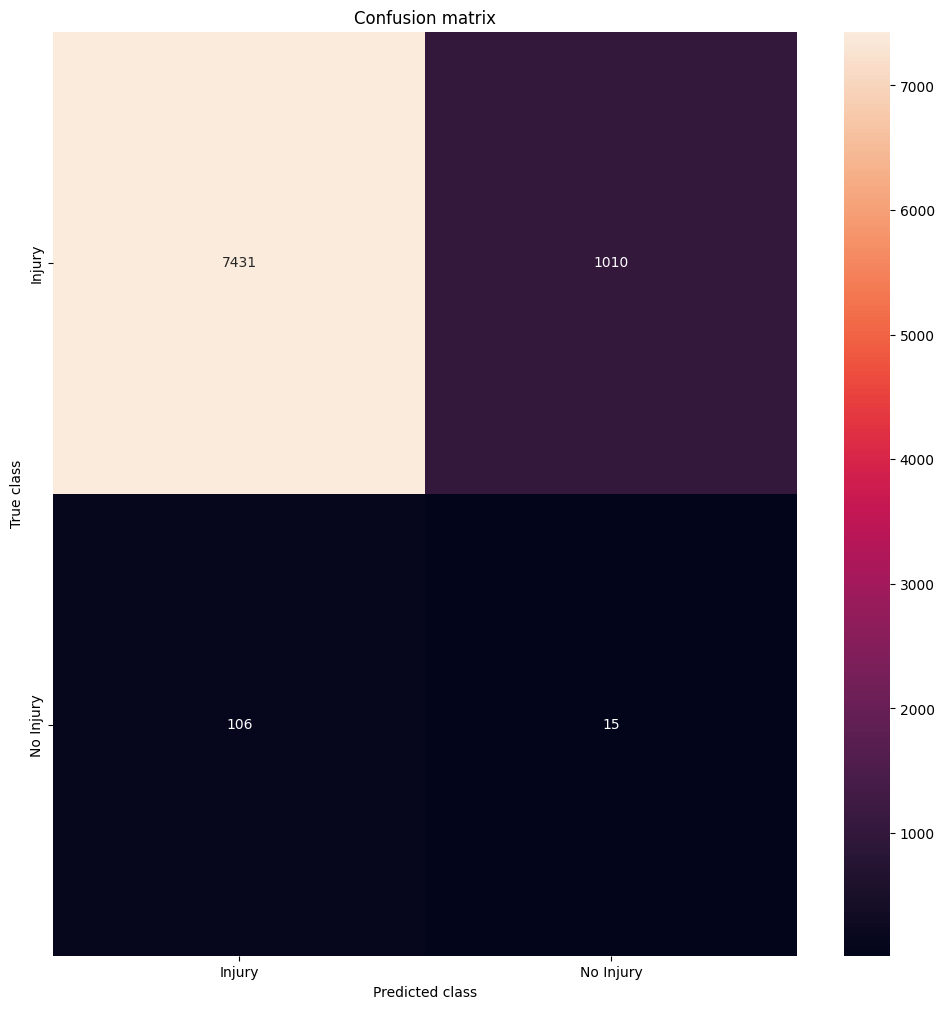

In [137]:
threshold = 85000 # we can equally choose to use different values for our threshold [0.009]
LABELS = ['Injury', 'No Injury']
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

The confusion matrix above helps us to understand our accuracy on the test data. 

We note that:
- 6963: The model predicts this case to be actually injury where the true case is injury too.
- 24: The model predicts no-injury with the true case being no injury.
- 96: The model predicts injury where the actual class in no-injury
- 1442: The model predicts no-injury where the actual class is injury.

The above explanation is given in the classification report below.

In [138]:
print(classification_report(error_df.true_class, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8441
           1       0.01      0.12      0.03       121

    accuracy                           0.87      8562
   macro avg       0.50      0.50      0.48      8562
weighted avg       0.97      0.87      0.92      8562



In [139]:
f1_score(error_df.true_class, y_pred)

0.02617801047120419

In [140]:
accuracy_score(error_df.true_class, y_pred)

0.869656622284513

In [141]:
mean_squared_error(error_df.true_class, y_pred)

0.13034337771548704

# Conclusion I

- All models i.e Autoenconders, Isolation Forest and One Class SVM have a high accuracy.  
- Isolation Forest has the best f1 score and we conclude it to be our best model.